In [1]:

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (10,12)
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget  
# plt.style.use('ggplot')
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax = plt.gca()
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y \n %B'))

from scipy.optimize import curve_fit

import os
# import csv
import math


from datetime import date,datetime


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]
def rnTime2(t,meanWidth):
    return t[math.floor(meanWidth)-1:]

saveFigures is set to: True
Done loading packages


In [2]:
# df = pd.read_excel('SSI_delta_2021_07_02.xlsx')
df = pd.read_excel('SSI_delta_2021_07_06.xlsx')
df['Prøvedato'] = pd.to_datetime(df['Prøvedato'])
df.sort_values(by='Prøvedato',inplace=True,ignore_index=True)
df

,Prøvedato,"Positive PCRtest, hvor der er foretaget Variant-PCR analyse",Formodet deltavariant,Inkonklusiv,Andre varianter,Deltavariant i pct. af Variant-PCR test
0,2021-06-01,1113,0,413,700,0
1,2021-06-02,949,2,306,641,0.21
2,2021-06-03,777,0,172,605,0
3,2021-06-04,759,2,165,592,0.26
4,2021-06-05,664,0,161,503,0
5,2021-06-06,573,2,147,424,0.35
6,2021-06-07,640,10,163,467,1.56
7,2021-06-08,541,9,142,390,1.66
8,2021-06-09,505,6,137,362,1.19
9,2021-06-10,443,8,165,270,1.81


In [3]:
print(df.columns)
curDates = pd.to_datetime(df.iloc[:,0])
numTest = df.iloc[:,1]
numDelta = df.iloc[:,2]
numInkon = df.iloc[:,3]
numOther = df.iloc[:,4]
percDelta = df.iloc[:,5]

Index(['Prøvedato',
       'Positive PCRtest, hvor der er foretaget Variant-PCR analyse',
       'Formodet deltavariant ', 'Inkonklusiv', 'Andre varianter',
       'Deltavariant i pct. af Variant-PCR test'],
      dtype='object')


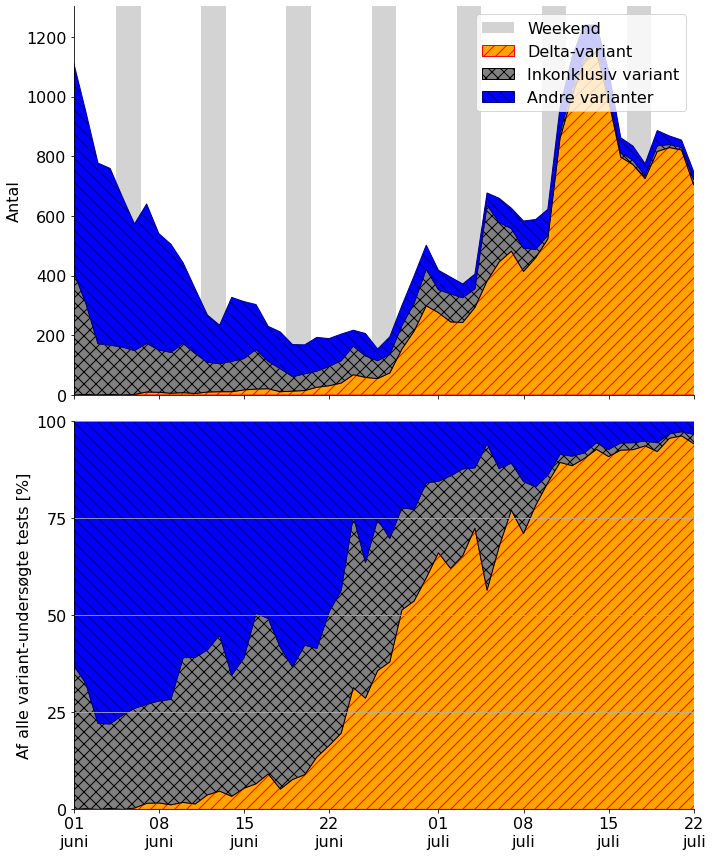

In [4]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

# ax1.plot(curDates,numTest,'k',label='Antal test')
ax1.fill_between(curDates,numDelta,color='orange',label='Delta-variant',hatch="//",edgecolor='red')
ax1.fill_between(curDates,numDelta+numInkon,numDelta,color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
ax1.fill_between(curDates,numOther+numDelta+numInkon,numDelta+numInkon,color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')


ax2.fill_between(curDates,100*np.divide(numDelta,numTest),color='orange',label='Delta-variant',hatch="//",edgecolor='red')
ax2.fill_between(curDates,100*np.divide(numDelta+numInkon,numTest),100*np.divide(numDelta,numTest),color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
ax2.fill_between(curDates,100*np.divide(numOther+numDelta+numInkon,numTest),100*np.divide(numDelta+numInkon,numTest),color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')



ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=100)

ax2.set_yticks([0,25,50,75,100])
# ax2.grid()
ax2.grid(axis='y')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.legend()

# firstDate = curDates.min() -  np.timedelta64(1,'D')
firstDate = curDates.min() 
# lastDate = np.datetime64(datetime.today()) + np.timedelta64(1,'D')
lastDate = curDates.max() + np.timedelta64(1,'D')
lastDate = np.datetime64('2021-07-22')


ax1.set_ylabel('Antal')
ax2.set_ylabel('Af alle variant-undersøgte tests [%]')

ax1.set_xlim([firstDate,lastDate])

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/DeltaOverblik') 

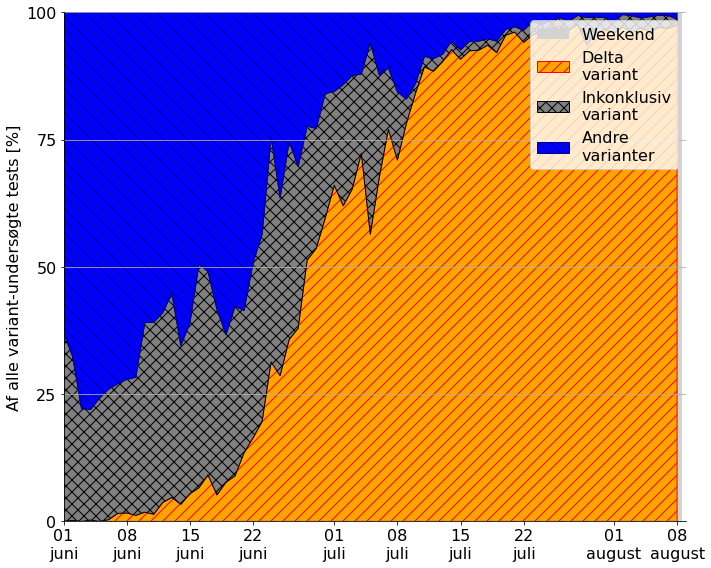

In [5]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,ax2 = plt.subplots(figsize=(10,8))

# ax1.plot(curDates,numTest,'k',label='Antal test')
# ax1.fill_between(curDates,numDelta,color='orange',label='Delta-variant',hatch="//",edgecolor='red')
# ax1.fill_between(curDates,numDelta+numInkon,numDelta,color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
# ax1.fill_between(curDates,numOther+numDelta+numInkon,numDelta+numInkon,color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')


ax2.fill_between(curDates,100*np.divide(numDelta,numTest),color='orange',label='Delta\nvariant',hatch="//",edgecolor='red')
ax2.fill_between(curDates,100*np.divide(numDelta+numInkon,numTest),100*np.divide(numDelta,numTest),color='grey',label='Inkonklusiv\nvariant',hatch="XX",edgecolor='black')
ax2.fill_between(curDates,100*np.divide(numOther+numDelta+numInkon,numTest),100*np.divide(numDelta+numInkon,numTest),color='blue',label='Andre\nvarianter',hatch="\\\\",edgecolor='darkblue')

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 50
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    # ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')



# ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0,top=100)

ax2.set_yticks([0,25,50,75,100])
# ax2.grid()
ax2.grid(axis='y')

# ax1.spines["right"].set_visible(False)
# ax1.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax2.legend(loc='upper right')

# firstDate = curDates.min() -  np.timedelta64(1,'D')
firstDate = curDates.min() 
# lastDate = np.datetime64(datetime.today()) + np.timedelta64(1,'D')
lastDate = curDates.max() + np.timedelta64(1,'D')
# lastDate = np.datetime64('2021-07-22')


# ax1.set_ylabel('Antal')
ax2.set_ylabel('Af alle variant-undersøgte tests [%]')

ax2.set_xlim([firstDate,lastDate])

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/DeltaOverblikPanel2') 

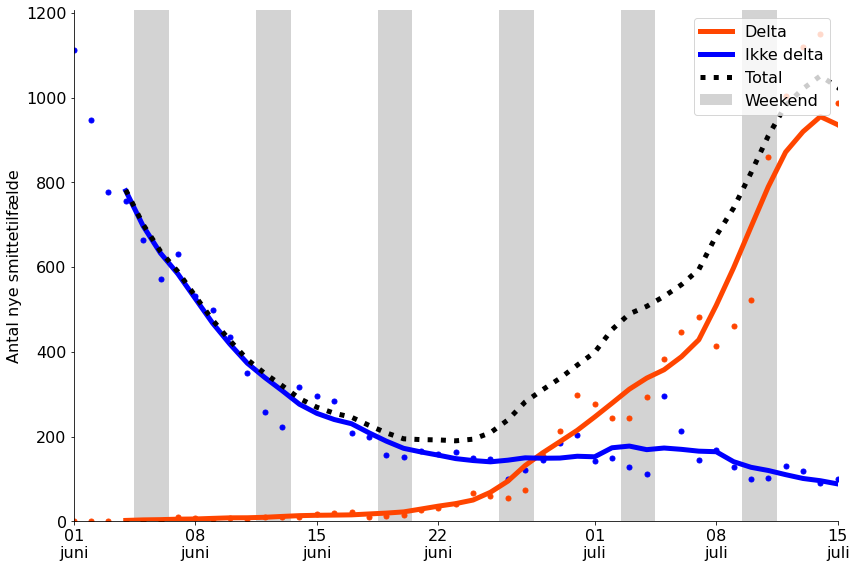

In [6]:
fig,ax1 = plt.subplots(figsize=(12,8))

numNonDelta = numOther + numInkon
numSum = numDelta + numNonDelta
ax1.plot(curDates,numDelta,'.',color='orangered')
ax1.plot(curDates,numNonDelta,'b.')
# ax1.plot(curDates,numSum,'k.')
ax1.plot(curDates[-3:],numSum[-3:],'k.')


# ax1.plot(rnTime2(curDates,7),rnMean(numNonDelta,7),'b')
ax1.plot(rnTime(curDates,7),rnMean(numDelta,7),color='orangered',linewidth=5,label='Delta')
ax1.plot(rnTime(curDates,7),rnMean(numNonDelta,7),'b',linewidth=5,label='Ikke delta')
ax1.plot(rnTime(curDates,7),rnMean(numSum,7),'k:',linewidth=5,label='Total')

# # ax1.plot(curDates,numTest,'k',label='Antal test')
# ax1.fill_between(curDates,numDelta,color='orange',label='Delta-variant',hatch="//",edgecolor='red')
# ax1.fill_between(curDates,numDelta+numInkon,numDelta,color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
# ax1.fill_between(curDates,numOther+numDelta+numInkon,numDelta+numInkon,color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')


# ax2.fill_between(curDates,100*np.divide(numDelta,numTest),color='orange',label='Delta-variant',hatch="//",edgecolor='red')
# ax2.fill_between(curDates,100*np.divide(numDelta+numInkon,numTest),100*np.divide(numDelta,numTest),color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
# ax2.fill_between(curDates,100*np.divide(numOther+numDelta+numInkon,numTest),100*np.divide(numDelta+numInkon,numTest),color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')



# ax1.set_ylim(bottom=0,top=400)
ax1.set_ylim(bottom=0)
ax2.grid(axis='y')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
# ax2.spines["right"].set_visible(False)
# ax2.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.legend(loc='upper right')

# firstDate = curDates.min() -  np.timedelta64(1,'D')
firstDate = curDates.min() 
# firstDate = curDates.min() + np.timedelta64(3,'D')
# lastDate = np.datetime64(datetime.today()) + np.timedelta64(1,'D')
lastDate = curDates.max() + np.timedelta64(1,'D')
lastDate = np.datetime64('2021-07-15')


ax1.set_ylabel('Antal nye smittetilfælde')
# ax2.set_ylabel('Af alle variant-undersøgte tests [%]')

ax1.set_xlim([firstDate,lastDate])

# ax1.set_yscale('log')
plt.tight_layout()

if saveFigures:
    plt.savefig('figs/DeltaDataFigur') 

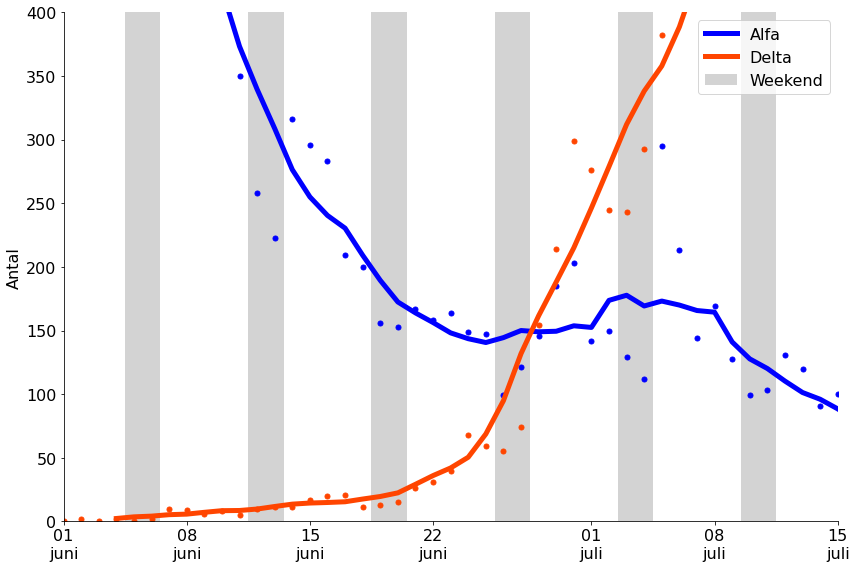

In [7]:
fig,ax1 = plt.subplots(figsize=(12,8))

numNonDelta = numOther + numInkon
ax1.plot(curDates,numNonDelta,'b.')
ax1.plot(curDates,numDelta,'.',color='orangered')


# ax1.plot(rnTime2(curDates,7),rnMean(numNonDelta,7),'b')
ax1.plot(rnTime(curDates,7),rnMean(numNonDelta,7),'b',linewidth=5,label='Alfa')
ax1.plot(rnTime(curDates,7),rnMean(numDelta,7),color='orangered',linewidth=5,label='Delta')

# # ax1.plot(curDates,numTest,'k',label='Antal test')
# ax1.fill_between(curDates,numDelta,color='orange',label='Delta-variant',hatch="//",edgecolor='red')
# ax1.fill_between(curDates,numDelta+numInkon,numDelta,color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
# ax1.fill_between(curDates,numOther+numDelta+numInkon,numDelta+numInkon,color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')


# ax2.fill_between(curDates,100*np.divide(numDelta,numTest),color='orange',label='Delta-variant',hatch="//",edgecolor='red')
# ax2.fill_between(curDates,100*np.divide(numDelta+numInkon,numTest),100*np.divide(numDelta,numTest),color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
# ax2.fill_between(curDates,100*np.divide(numOther+numDelta+numInkon,numTest),100*np.divide(numDelta+numInkon,numTest),color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    # ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')



ax1.set_ylim(bottom=0,top=400)
# ax2.set_ylim(bottom=0,top=100)

# ax2.set_yticks([0,25,50,75,100])
# ax2.grid()
ax2.grid(axis='y')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
# ax2.spines["right"].set_visible(False)
# ax2.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.legend(loc='upper right')

# firstDate = curDates.min() -  np.timedelta64(1,'D')
# firstDate = curDates.min() 
# firstDate = curDates.min() + np.timedelta64(3,'D')
# lastDate = np.datetime64(datetime.today()) + np.timedelta64(1,'D')
lastDate = curDates.max() + np.timedelta64(1,'D')
lastDate = np.datetime64('2021-07-15')


ax1.set_ylabel('Antal')
# ax2.set_ylabel('Af alle variant-undersøgte tests [%]')

ax1.set_xlim([firstDate,lastDate])

# ax1.set_yscale('log')
plt.tight_layout()

if saveFigures:
    plt.savefig('figs/DeltaDataSimpel') 

In [8]:
firstDateToUse = np.datetime64('2021-06-06')
numOther = numOther[curDates > firstDateToUse]
numInkon = numInkon[curDates > firstDateToUse]
numTest = numTest[curDates > firstDateToUse]
numDelta = numDelta[curDates > firstDateToUse]
curDates = curDates[curDates > firstDateToUse]

In [9]:
# Model tests
def logiModel(x,alpha,y0):
    parenthesis = (1-y0)/y0
    return 1/(1+parenthesis*np.exp(-alpha*x))
def linModel(x,a,y0):
    return a*x+y0


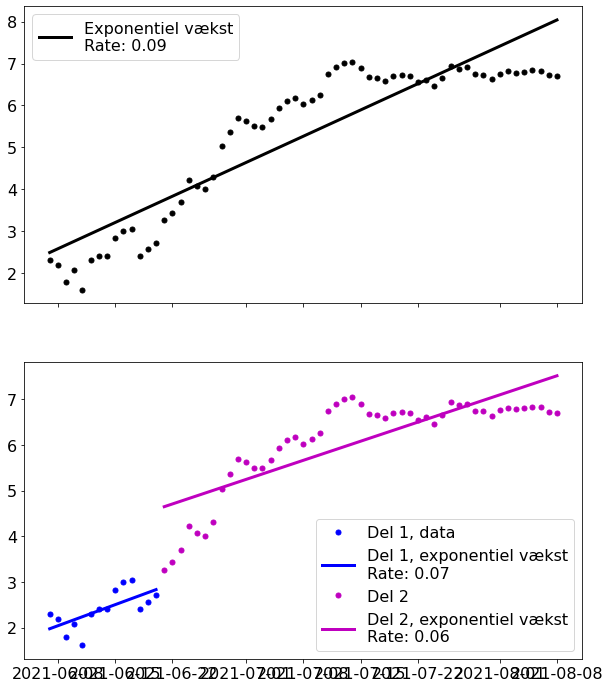

In [10]:
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

partSplit = 14

x_all = np.arange(0,len(curDates))
x_part1 = np.arange(0,partSplit)
x_part2 = np.arange(partSplit,len(curDates))

y_part1 = numDelta[0:partSplit]
y_part2 = numDelta[partSplit:]

date_part1 = curDates[0:partSplit]
date_part2 = curDates[partSplit:]


ax1.plot(curDates,np.log(numDelta),'.',color='k')
popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
curLabel = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'
ax1.plot(curDates,linModel(x_all,popt_all[0],popt_all[1]),'k',label=curLabel)

# Del 1
ax2.plot(date_part1,np.log(y_part1),'.',color='b',label='Del 1, data')
popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

curLabel = f'Del 1, exponentiel vækst\nRate: {popt[0]:2.2f}'
ax2.plot(date_part1,linModel(x_part1,popt[0],popt[1]),'b',label=curLabel)

# Del 2
ax2.plot(date_part2,np.log(y_part2),'.',color='m',label='Del 2')
popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))
curLabel = f'Del 2, exponentiel vækst\nRate: {popt2[0]:2.2f}'
ax2.plot(date_part2,linModel(x_part2,popt2[0],popt2[1]),'m',label=curLabel)

ax1.legend()
ax2.legend()

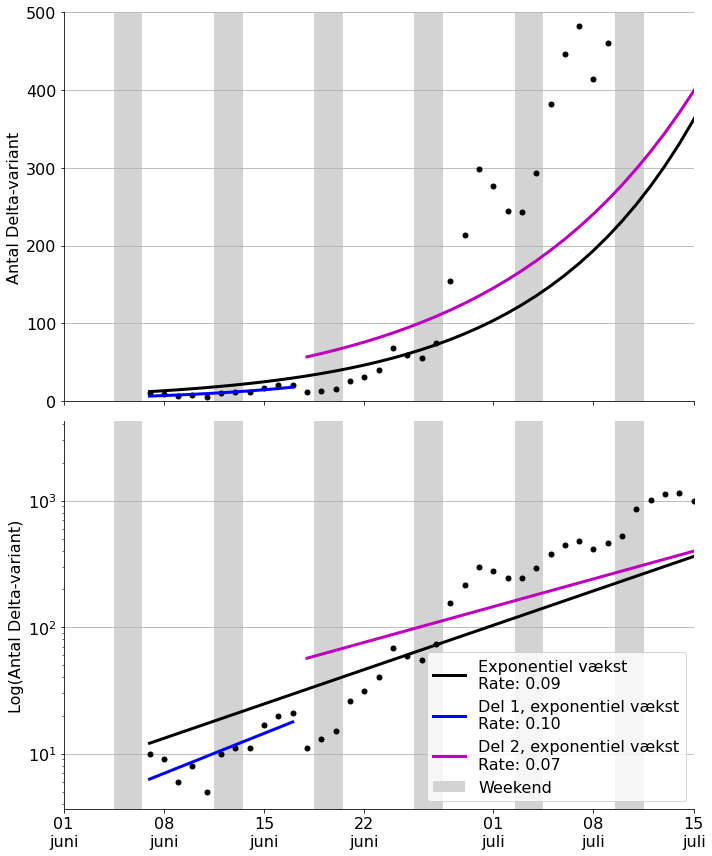

In [11]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

partSplit = 11

x_all = np.arange(0,len(curDates))
x_part1 = np.arange(0,partSplit)
x_part2 = np.arange(partSplit,len(curDates))

y_part1 = numDelta[0:partSplit]
y_part2 = numDelta[partSplit:]

date_part1 = curDates[0:partSplit]
date_part2 = curDates[partSplit:]


# ax1.plot(curDates,np.log(numDelta),'.',color='k')
ax1.plot(curDates,numDelta,'.',color='k')
popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
curLabel_all = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'
# ax1.plot(curDates,linModel(x_all,popt_all[0],popt_all[1]),'k',label=curLabel_all)
ax1.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)

# Del 1
# ax2.plot(date_part1,np.log(y_part1),'.',color='b',label='Del 1, data')
popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

curLabel_1 = f'Del 1, exponentiel vækst\nRate: {popt[0]:2.2f}'
# ax1.plot(date_part1,linModel(x_part1,popt[0],popt[1]),'b',label=curLabel_1)
ax1.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)

# Del 2
# ax1.plot(date_part2,y_part2,'.',color='m',markersize=2,label='Del 2')
popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))
curLabel_2 = f'Del 2, exponentiel vækst\nRate: {popt2[0]:2.2f}'
# ax1.plot(date_part2,linModel(x_part2,popt2[0],popt2[1]),'m',label=curLabel_2)
ax1.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)

# Plot på normal y-akse
ax2.plot(curDates,numDelta,'.',color='k')
ax2.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)
ax2.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)
ax2.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')


# ax1.legend()
# ax2.legend(loc='upper left')
ax2.legend(loc='lower right')

ax2.grid(axis='y')
ax1.grid(axis='y')

# ax1.set_ylim(bottom=0)
ax1.set_ylim(bottom=0,top=500)

ax1.set_ylabel('Antal Delta-variant')
ax2.set_ylabel('Log(Antal Delta-variant)')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_xlim([firstDate,lastDate])

ax2.set_yscale('log')

plt.tight_layout()


if saveFigures:
    plt.savefig('figs/DeltaGrowth') 

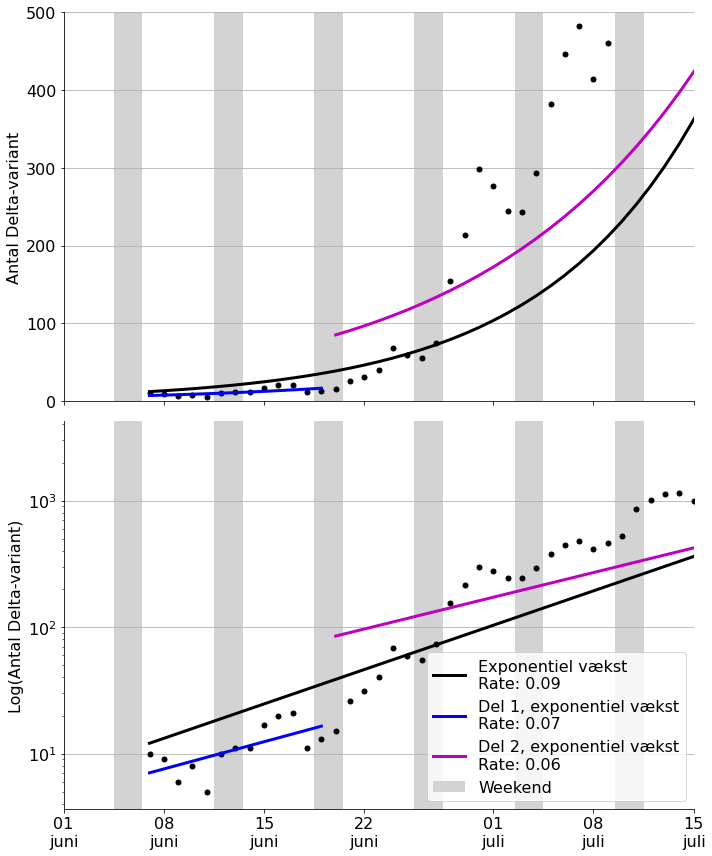

In [12]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)

partSplit = 13

x_all = np.arange(0,len(curDates))
x_part1 = np.arange(0,partSplit)
x_part2 = np.arange(partSplit,len(curDates))

y_part1 = numDelta[0:partSplit]
y_part2 = numDelta[partSplit:]

date_part1 = curDates[0:partSplit]
date_part2 = curDates[partSplit:]


# ax1.plot(curDates,np.log(numDelta),'.',color='k')
ax1.plot(curDates,numDelta,'.',color='k')
popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
curLabel_all = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'
# ax1.plot(curDates,linModel(x_all,popt_all[0],popt_all[1]),'k',label=curLabel_all)
ax1.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)

# Del 1
# ax2.plot(date_part1,np.log(y_part1),'.',color='b',label='Del 1, data')
popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

curLabel_1 = f'Del 1, exponentiel vækst\nRate: {popt[0]:2.2f}'
# ax1.plot(date_part1,linModel(x_part1,popt[0],popt[1]),'b',label=curLabel_1)
ax1.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)

# Del 2
# ax1.plot(date_part2,y_part2,'.',color='m',markersize=2,label='Del 2')
popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))
curLabel_2 = f'Del 2, exponentiel vækst\nRate: {popt2[0]:2.2f}'
# ax1.plot(date_part2,linModel(x_part2,popt2[0],popt2[1]),'m',label=curLabel_2)
ax1.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)

# Plot på normal y-akse
ax2.plot(curDates,numDelta,'.',color='k')
ax2.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)
ax2.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)
ax2.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')


# ax1.legend()
# ax2.legend()
ax2.legend(loc='lower right')

ax2.grid(axis='y')
ax1.grid(axis='y')

# ax1.set_ylim(bottom=0)
ax1.set_ylim(bottom=0,top=500)

ax1.set_ylabel('Antal Delta-variant')
ax2.set_ylabel('Log(Antal Delta-variant)')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax2.set_yscale('log')
ax1.set_xlim([firstDate,lastDate])

plt.tight_layout()


if saveFigures:
    plt.savefig('figs/DeltaGrowth2') 

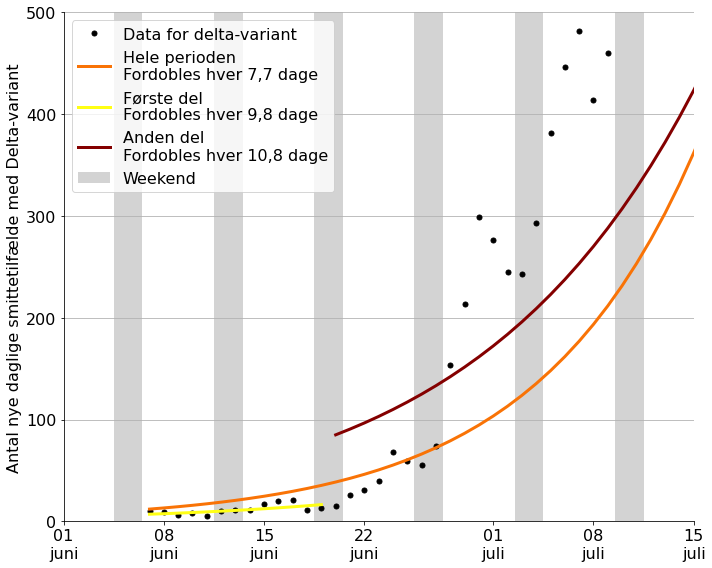

In [13]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,ax1 = plt.subplots(figsize=(10,8))

partSplit = 13

x_all = np.arange(0,len(curDates))
x_part1 = np.arange(0,partSplit)
x_part2 = np.arange(partSplit,len(curDates))

y_part1 = numDelta[0:partSplit]
y_part2 = numDelta[partSplit:]

date_part1 = curDates[0:partSplit]
date_part2 = curDates[partSplit:]


# ax1.plot(curDates,np.log(numDelta),'.',color='k')
ax1.plot(curDates,numDelta,'.',color='k',label='Data for delta-variant')
popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
curLabel_all = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'
double_all = np.log(2)/popt_all[0]
# curLabel_all = f'Hele perioden\nFordobling {double_all:2.1f} dage'.replace('.',',')
curLabel_all = f'Hele perioden\nFordobles hver {double_all:2.1f} dage'.replace('.',',')
# ax1.plot(curDates,linModel(x_all,popt_all[0],popt_all[1]),'k',label=curLabel_all)
# ax1.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)
ax1.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),color='xkcd:orange',label=curLabel_all)

# Del 1
# ax2.plot(date_part1,np.log(y_part1),'.',color='b',label='Del 1, data')
popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

curLabel_1 = f'Del 1, exponentiel vækst\nRate: {popt[0]:2.2f}'
double_1 = np.log(2)/popt[0]
# curLabel_1 = f'Første del\nFordobling {double_1:2.1f} dage'.replace('.',',')
curLabel_1 = f'Første del\nFordobles hver {double_1:2.1f} dage'.replace('.',',')
# ax1.plot(date_part1,linModel(x_part1,popt[0],popt[1]),'b',label=curLabel_1)
# ax1.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)
ax1.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'xkcd:yellow',label=curLabel_1)

# Del 2
# ax1.plot(date_part2,y_part2,'.',color='m',markersize=2,label='Del 2')
popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))
curLabel_2 = f'Del 2, exponentiel vækst\nRate: {popt2[0]:2.2f}'
double_2 = np.log(2)/popt2[0]
# curLabel_2 = f'Anden del\nFordobling {double_2:2.1f} dage'.replace('.',',')
curLabel_2 = f'Anden del\nFordobles hver {double_2:2.1f} dage'.replace('.',',')
# ax1.plot(date_part2,linModel(x_part2,popt2[0],popt2[1]),'m',label=curLabel_2)
# ax1.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)
ax1.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),color='xkcd:dark red',label=curLabel_2)

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')


# ax1.legend()
# ax2.legend()
# ax1.legend(loc='lower right')
ax1.legend(loc='upper left')

ax1.grid(axis='y')

# ax1.set_ylim(bottom=0)
ax1.set_ylim(bottom=0,top=500)

ax1.set_ylabel('Antal nye daglige smittetilfælde med Delta-variant')
# ax2.set_ylabel('Log(Antal Delta-variant)')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax1.set_xlim([firstDate,lastDate])

plt.tight_layout()


if saveFigures:
    plt.savefig('figs/DeltaGrowth_Panel1') 

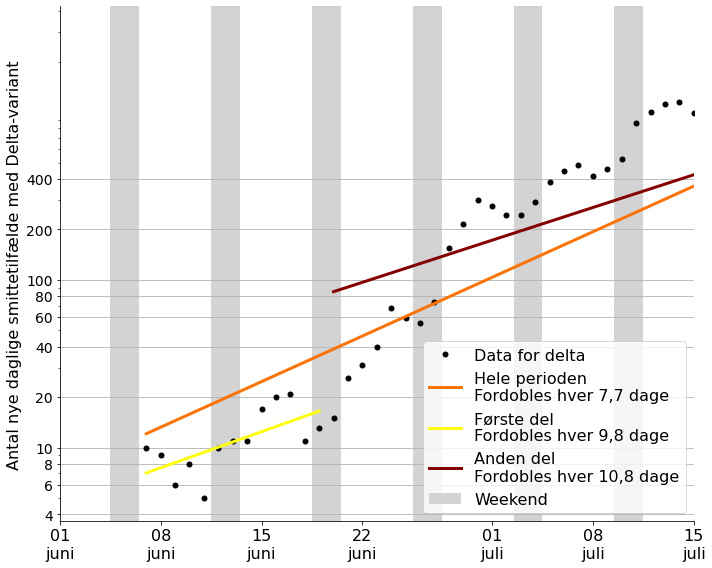

In [14]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,ax2 = plt.subplots(figsize=(10,8))

partSplit = 13

x_all = np.arange(0,len(curDates))
x_part1 = np.arange(0,partSplit)
x_part2 = np.arange(partSplit,len(curDates))

y_part1 = numDelta[0:partSplit]
y_part2 = numDelta[partSplit:]

date_part1 = curDates[0:partSplit]
date_part2 = curDates[partSplit:]


# ax1.plot(curDates,np.log(numDelta),'.',color='k')
# ax1.plot(curDates,numDelta,'.',color='k')
popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
curLabel_all = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'
# ax1.plot(curDates,linModel(x_all,popt_all[0],popt_all[1]),'k',label=curLabel_all)
# ax1.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)

# Del 1
# ax2.plot(date_part1,np.log(y_part1),'.',color='b',label='Del 1, data')
popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

curLabel_1 = f'Del 1, exponentiel vækst\nRate: {popt[0]:2.2f}'
# ax1.plot(date_part1,linModel(x_part1,popt[0],popt[1]),'b',label=curLabel_1)
# ax1.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)

# Del 2
# ax1.plot(date_part2,y_part2,'.',color='m',markersize=2,label='Del 2')
popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))
curLabel_2 = f'Del 2, exponentiel vækst\nRate: {popt2[0]:2.2f}'
# ax1.plot(date_part2,linModel(x_part2,popt2[0],popt2[1]),'m',label=curLabel_2)
# ax1.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)


# ax1.plot(curDates,np.log(numDelta),'.',color='k')
# ax1.plot(curDates,numDelta,'.',color='k')
popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
curLabel_all = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'
double_all = np.log(2)/popt_all[0]
# curLabel_all = f'Hele perioden\nFordobling {double_all:2.1f} dage'.replace('.',',')
curLabel_all = f'Hele perioden\nFordobles hver {double_all:2.1f} dage'.replace('.',',')
# ax1.plot(curDates,linModel(x_all,popt_all[0],popt_all[1]),'k',label=curLabel_all)
# ax1.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)

# Del 1
# ax2.plot(date_part1,np.log(y_part1),'.',color='b',label='Del 1, data')
popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

curLabel_1 = f'Del 1, exponentiel vækst\nRate: {popt[0]:2.2f}'
double_1 = np.log(2)/popt[0]
# curLabel_1 = f'Første del\nFordobling {double_1:2.1f} dage'.replace('.',',')
curLabel_1 = f'Første del\nFordobles hver {double_1:2.1f} dage'.replace('.',',')
# ax1.plot(date_part1,linModel(x_part1,popt[0],popt[1]),'b',label=curLabel_1)
# ax1.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)

# Del 2
# ax1.plot(date_part2,y_part2,'.',color='m',markersize=2,label='Del 2')
popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))
curLabel_2 = f'Del 2, exponentiel vækst\nRate: {popt2[0]:2.2f}'
double_2 = np.log(2)/popt2[0]
# curLabel_2 = f'Anden del\nFordobling {double_2:2.1f} dage'.replace('.',',')
curLabel_2 = f'Anden del\nFordobles hver {double_2:2.1f} dage'.replace('.',',')
# ax1.plot(date_part2,linModel(x_part2,popt2[0],popt2[1]),'m',label=curLabel_2)
# ax1.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)


# Plot på normal y-akse
ax2.plot(curDates,numDelta,'.',color='k',label='Data for delta')
# ax2.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),'k',label=curLabel_all)
# ax2.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'b',label=curLabel_1)
# ax2.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'m',label=curLabel_2)
ax2.plot(curDates,np.exp(linModel(x_all,popt_all[0],popt_all[1])),color='xkcd:orange',label=curLabel_all)
ax2.plot(date_part1,np.exp(linModel(x_part1,popt[0],popt[1])),'xkcd:yellow',label=curLabel_1)
ax2.plot(date_part2,np.exp(linModel(x_part2,popt2[0],popt2[1])),'xkcd:dark red',label=curLabel_2)

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    # ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
    ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax2.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')


# ax1.legend()
# ax2.legend()
ax2.legend(loc='lower right')

ax2.grid(axis='y')
# ax1.grid(axis='y')

# ax1.set_ylim(bottom=0)
# ax1.set_ylim(bottom=0,top=250)

ax2.set_ylabel('Antal nye daglige smittetilfælde med Delta-variant')

ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))

ax2.set_yscale('log')



ax2.set_xlim([firstDate,lastDate])

plt.tight_layout()
if saveFigures:
    plt.savefig('figs/DeltaGrowth_Panel2') 
    
# ax2.set_yticks([10, 20, 50,100,200,500])
# ax2.set_yticks([5,6,7,8,9,10, 20, 30,40,50,60,70,80,90,100,200,300,400,500])
ax2.set_yticks([4,6,8,10, 20,40,60,80,100,200,400])

import matplotlib
ax2.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax2.get_yaxis().get_major_formatter().labelOnlyBase = False

plt.yticks(fontsize=14)

plt.tight_layout()
if saveFigures:
    plt.savefig('figs/DeltaGrowth_Panel2_NormaleTal') 

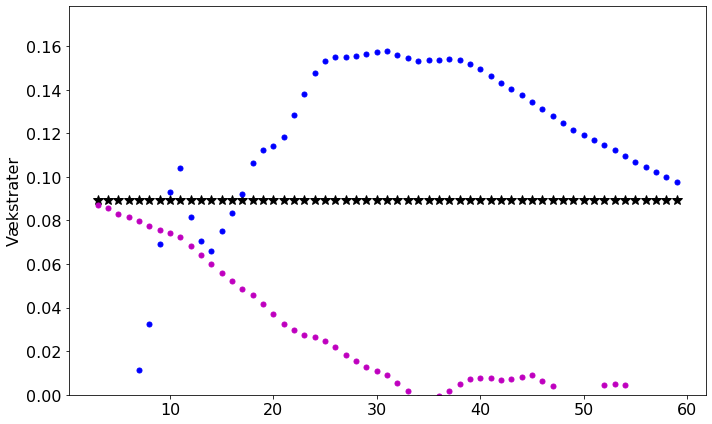

In [15]:
# fig,(ax1,ax2) = plt.subplots(2,1,sharex=True)
fig,ax1 = plt.subplots(figsize=(10,6))


for partSplit in range(3,len(curDates)-3):


    x_all = np.arange(0,len(curDates))
    x_part1 = np.arange(0,partSplit)
    x_part2 = np.arange(partSplit,len(curDates))

    y_part1 = numDelta[0:partSplit]
    y_part2 = numDelta[partSplit:]

    date_part1 = curDates[0:partSplit]
    date_part2 = curDates[partSplit:]

    popt_all, pcov = curve_fit(linModel, x_all,np.log(numDelta))
    curLabel_all = f'Exponentiel vækst\nRate: {popt_all[0]:2.2f}'

    # Del 1
    popt, pcov = curve_fit(linModel, x_part1,np.log(y_part1))

    # Del 2
    popt2, pcov = curve_fit(linModel, x_part2,np.log(y_part2))


    ax1.plot(partSplit,popt_all[0],'k*')
    ax1.plot(partSplit,popt[0],'b.')
    ax1.plot(partSplit,popt2[0],'m.')

ax1.set_ylabel('Vækstrater')
ax1.set_ylim(bottom=0)

plt.tight_layout()


# Logistisk vækst

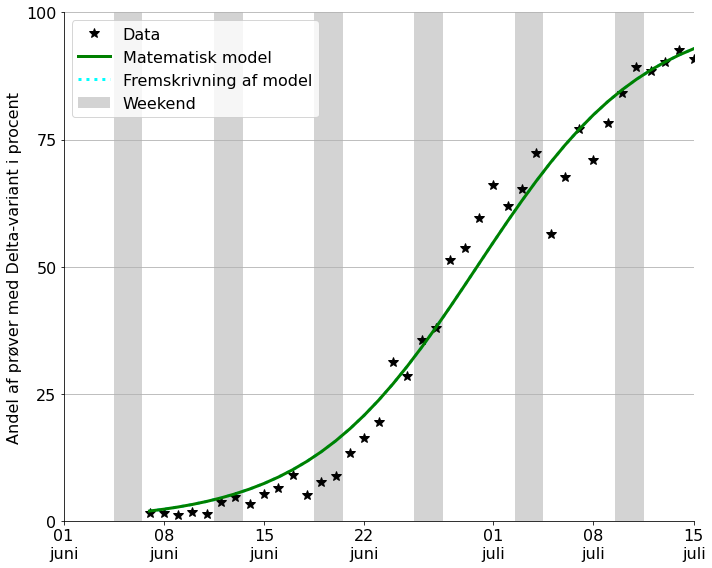

In [16]:

fig,ax1=plt.subplots(figsize=(10,8))

deltaRate = np.divide(numDelta,numTest)

# ax1.fill_between(curDates,100*np.divide(numDelta,numTest),color='orange',label='Delta-variant',hatch="//",edgecolor='red')
# ax1.fill_between(curDates,100*np.divide(numDelta+numInkon,numTest),100*np.divide(numDelta,numTest),color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
# ax1.fill_between(curDates,100*np.divide(numOther+numDelta+numInkon,numTest),100*np.divide(numDelta+numInkon,numTest),color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')

ax1.plot(curDates,100*deltaRate,'*',color='k',label='Data')
popt_logi, pcov_logi = curve_fit(logiModel, x_all,deltaRate)

# curLabel = f'Logistisk vækst\nVækstrate: {popt_logi[0]:2.2f}'
curLabel = f'Matematisk model'
ax1.plot(curDates,100*logiModel(x_all,popt_logi[0],popt_logi[1]),color='g',label=curLabel)

numDayPred = 50
predDates = np.arange(curDates.values[0],curDates.values[0]+np.timedelta64(numDayPred,'D'),np.timedelta64(1,'D'))
x_pred = np.arange(0,numDayPred)
curLabel = f'Fremskrivning af model'
ax1.plot(predDates,100*logiModel(x_pred,popt_logi[0],popt_logi[1]),':',color='xkcd:cyan',label=curLabel,zorder=-1)

# Draw weekends
firstSunday = np.datetime64('2021-05-30')
numWeeks = 10
for k in range(0,numWeeks):
    curSunday = firstSunday + np.timedelta64(7*k,'D')
    ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',zorder=-1)
ax1.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),facecolor='lightgrey',label='Weekend')

ax1.set_yticks([0,25,50,75,100])

# ax1.set_xlim(left=curDates.values[0])
ax1.set_xlim([firstDate,lastDate])
ax1.set_ylim(bottom=0,top=100)

ax1.set_ylabel('Andel af prøver med Delta-variant i procent')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.grid(axis='y')
ax1.legend(loc='upper left')
plt.tight_layout()

if saveFigures:
    plt.savefig('figs/DeltaLogistiskFremskrivning')

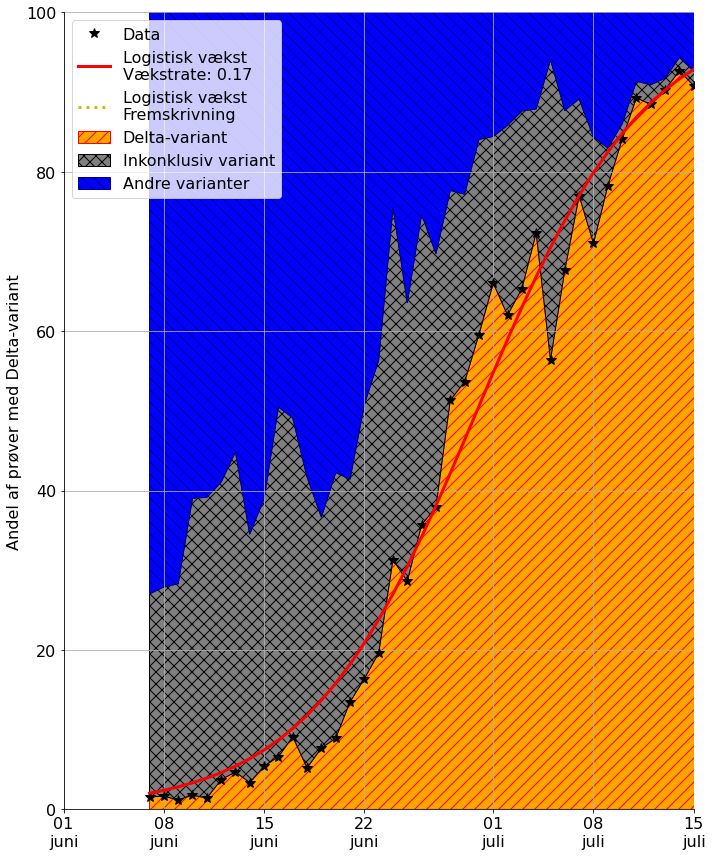

In [17]:

fig,ax1=plt.subplots()

deltaRate = np.divide(numDelta,numTest)

ax1.fill_between(curDates,100*np.divide(numDelta,numTest),color='orange',label='Delta-variant',hatch="//",edgecolor='red')
ax1.fill_between(curDates,100*np.divide(numDelta+numInkon,numTest),100*np.divide(numDelta,numTest),color='grey',label='Inkonklusiv variant',hatch="XX",edgecolor='black')
ax1.fill_between(curDates,100*np.divide(numOther+numDelta+numInkon,numTest),100*np.divide(numDelta+numInkon,numTest),color='blue',label='Andre varianter',hatch="\\\\",edgecolor='darkblue')

ax1.plot(curDates,100*deltaRate,'*',color='k',label='Data')
popt_logi, pcov_logi = curve_fit(logiModel, x_all,deltaRate)

curLabel = f'Logistisk vækst\nVækstrate: {popt_logi[0]:2.2f}'
ax1.plot(curDates,100*logiModel(x_all,popt_logi[0],popt_logi[1]),color='red',label=curLabel)

numDayPred = 50
predDates = np.arange(curDates.values[0],curDates.values[0]+np.timedelta64(numDayPred,'D'),np.timedelta64(1,'D'))
x_pred = np.arange(0,numDayPred)
curLabel = f'Logistisk vækst\nFremskrivning'
ax1.plot(predDates,100*logiModel(x_pred,popt_logi[0],popt_logi[1]),':',color='xkcd:gold',label=curLabel,zorder=-1)

# ax1.set_xlim(left=curDates.values[0])
ax1.set_xlim([firstDate,lastDate])
ax1.set_ylim(bottom=0,top=100)

ax1.set_ylabel('Andel af prøver med Delta-variant')

ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%B'))
ax1.grid()
ax1.legend()
plt.tight_layout()

if saveFigures:
    plt.savefig('figs/DeltaLogistiskFremskrivning2')

# Principiel figur af eksp. fald og eksp. vækst

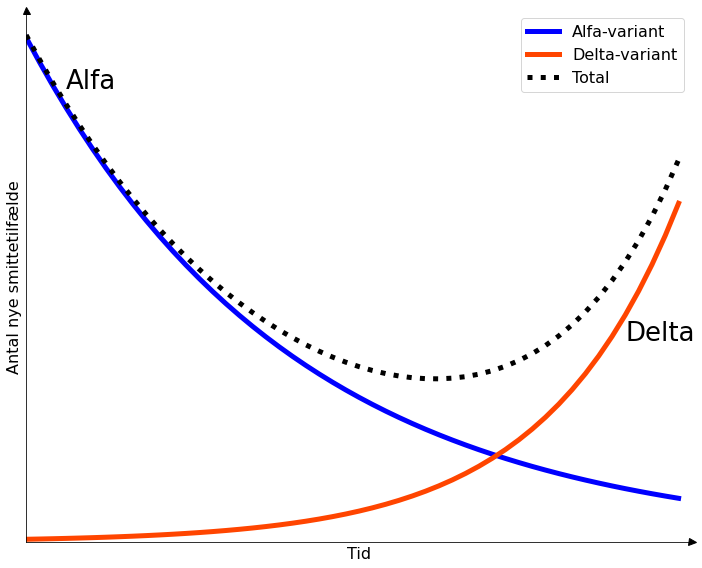

In [18]:
curmax = 65
curmax = 50
tRange = np.arange(0,curmax)

alpha1 = 0.95
alpha2 = 1.1

b1 = 50
b2 = 0.25

y1 = b1 * np.exp((alpha1-1) * tRange)
y2 = b2 * np.exp((alpha2-1) * tRange)

fig,ax = plt.subplots(figsize=(10,8))

ax.plot(tRange,y1,'b',label='Alfa-variant',linewidth=5)
ax.plot(tRange,y2,color='orangered',label='Delta-variant',linewidth=5)
ax.plot(tRange,y1+y2,'k:',label='Total',linewidth=5)

# ax.text(5,b1,f'$$\alpha$$')
ax.text(3,b1*0.9,'Alfa',fontsize=26)
ax.text(curmax-5,20,'Delta',fontsize=26)

ax.legend(loc='upper right')

ax.set_yticks([])
ax.set_xticks([])
# ax.set_yticklabels([])
# ax.set_xticklabels([])


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlim(left=0,right=curmax)
ax.set_ylim(bottom=0)


ax.set_xlabel('Tid')
ax.set_ylabel('Antal nye smittetilfælde')

# make arrows
ax.plot((1), (0), ls="", marker=">", ms=7, color="k",
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=7, color="k",
        transform=ax.get_xaxis_transform(), clip_on=False)

plt.tight_layout()

plt.savefig('figs/FraAlfaTilDelta')

In [19]:
# df
# numDelta
# numTest
# numInkon

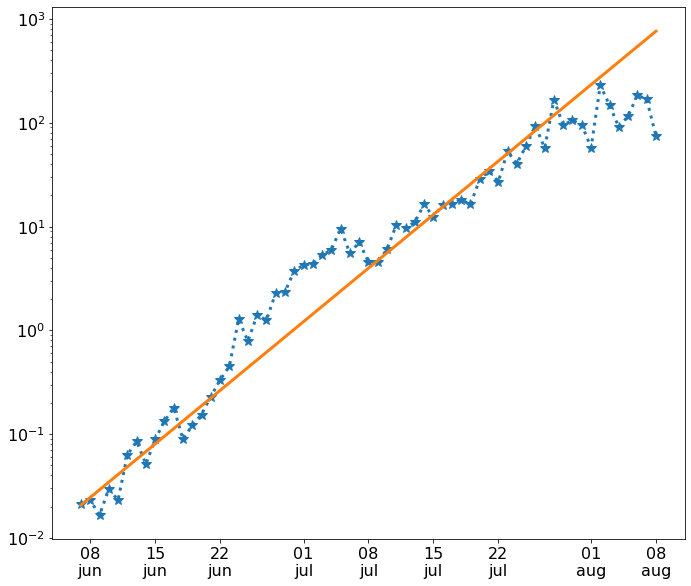

In [21]:

fig,ax1=plt.subplots(figsize=(10,8))

# deltaRate = np.divide(numDelta,numTest)
deltaRate = np.divide(numDelta,numTest-numInkon)


# ax1.plot(curDates,deltaRate)

toPlot = deltaRate/(1-deltaRate)

ax1.plot(curDates,toPlot,'*:')
# ax1.plot(curDates,np.log(toPlot),'*:')


rateModel = logiModel(x_all,popt_logi[0],popt_logi[1])

toPlotModel = rateModel/(1-rateModel)
# ax1.plot(curDates,100*logiModel(x_all,popt_logi[0],popt_logi[1]),color='g',label=curLabel)

ax1.plot(curDates,toPlotModel)
# ax1.plot(curDates,np.log(toPlotModel))

ax1.set_yscale('log')

plt.tight_layout()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))

plt.savefig('figs/logp1minusp')